In [ ]:
from google.colab import files
uploaded= files.upload()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [14]:
# read the Airbnb Data
df = pd.read_excel('Airbnb_Open_Data (1).xlsx')

ACCESS THE DATA

In [15]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [17]:
df.duplicated().value_counts()


,count
False,102058
True,541


Summary  Statistics

In [18]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


What are the different property types in the dataset?

In [19]:
# what are the different property types in dataset?
property_types = df['room type'].value_counts().to_frame()
property_types


,count
room type,
Entire home/apt,53701
Private room,46556
Shared room,2226
Hotel room,116


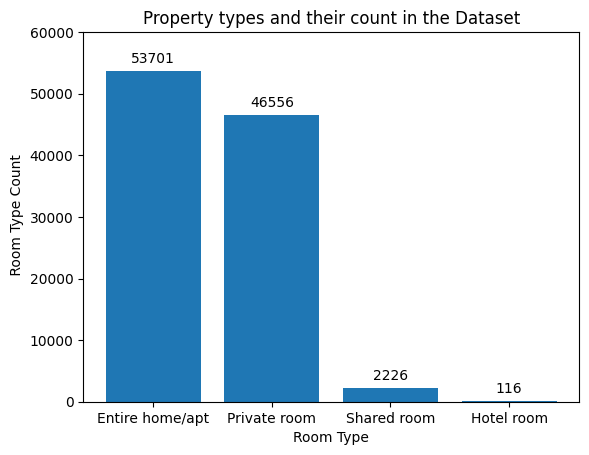

In [20]:
# room type count plotted on abar chart
room_type_bar =plt.bar(property_types.index, property_types.loc[:,"count"] );
plt.bar_label(room_type_bar, labels =property_types.loc[:,"count"],padding=4);
plt.ylim(0,60000);
plt.xlabel("Room Type");
plt.ylabel(" Room Type Count");
plt.title("Property types and their count in the Dataset");

What neighborhood group has the highest number of listings?

In [21]:
hood_group =df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,43792
Brooklyn,41842
Queens,13267
Bronx,2712
Staten Island,955
brookln,1
manhatan,1


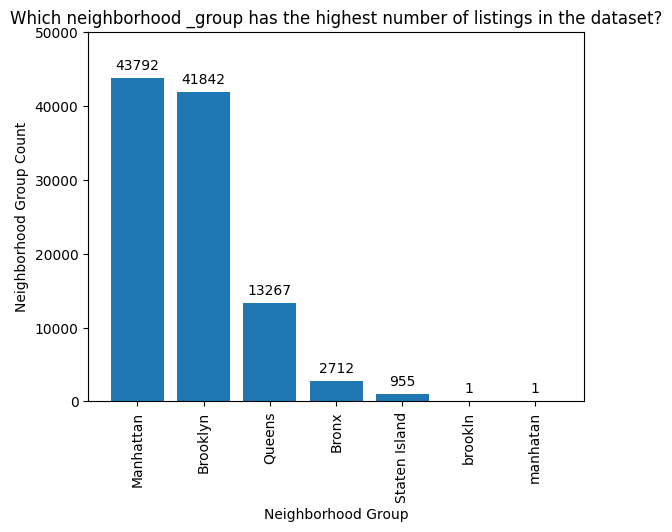

In [22]:
# Which neighborhood _group has the highest number of listings?
hood_group_bar =plt.bar(hood_group.index, hood_group.loc[:,"count"] );
plt.bar_label(hood_group_bar, labels =hood_group.loc[:,"count"],padding=4);
plt.ylim(0,50000);
plt.xlabel("Neighborhood Group");
plt.ylabel("Neighborhood Group Count");
plt.xticks(rotation=90);
plt.title("Which neighborhood _group has the highest number of listings in the dataset?");


Which Neighborhoods Group Have The Highest Average Prices for Airbnb Listings?

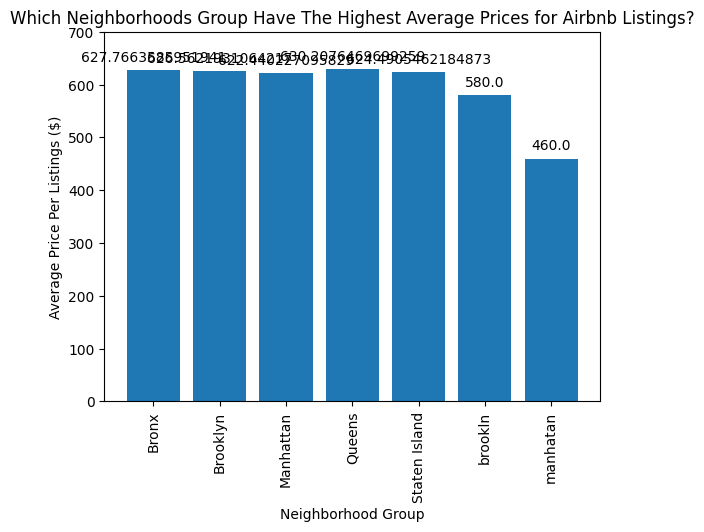

In [23]:
#Which Neighborhoods Group Have The Highest Average Prices for Airbnb Listings?
avg_price =df.groupby('neighbourhood group')['price'].mean().to_frame()
avg_price_bar =plt.bar(avg_price.index, avg_price.loc[:,"price"] );
plt.bar_label(avg_price_bar, labels = avg_price.loc[:,"price"],padding=4);
plt.ylim(0,700);
plt.xlabel("Neighborhood Group");
plt.ylabel("Average Price Per Listings ($)");
plt.xticks(rotation=90);
plt.title("Which Neighborhoods Group Have The Highest Average Prices for Airbnb Listings?");

Is There a realationship between the construction year of property and price?

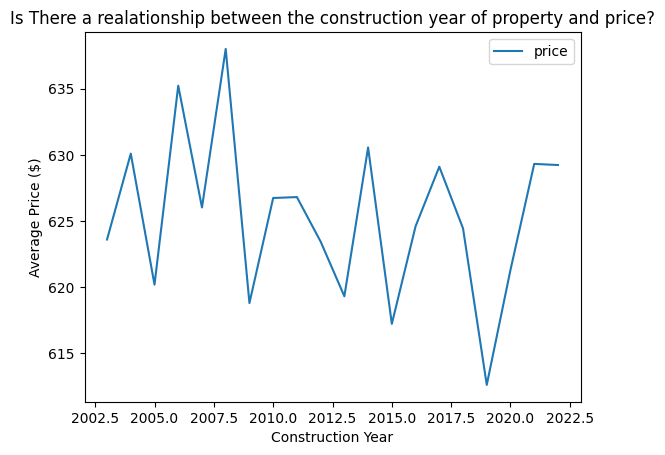

In [24]:
# Is There a realationship between the construction year of property and price?
df.groupby(df['Construction year'])['price'].mean().to_frame().plot();
plt.xlabel("Construction Year");
plt.ylabel("Average Price ($)");
plt.title("Is There a realationship between the construction year of property and price?");

Who are the top 10 hosts by calculated host listing count?

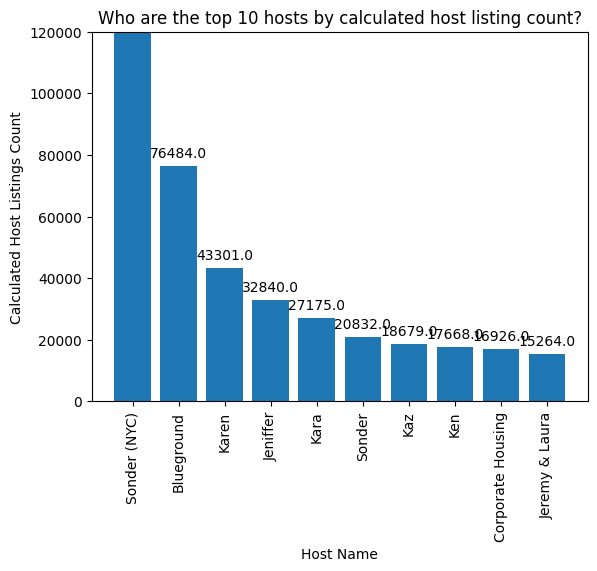

In [25]:
#Who are the top 10 hosts by calculated host listing count?\
hosts=df.groupby('host name')['calculated host listings count'].sum().to_frame().sort_values(by='calculated host listings count',ascending=False).head(10)
hosts_bar =plt.bar(hosts.index, hosts.loc[:,"calculated host listings count"] );
plt.bar_label(hosts_bar, labels =hosts.loc[:,"calculated host listings count"],padding=4);
plt.ylim(0,120000);
plt.xlabel("Host Name");
plt.ylabel("Calculated Host Listings Count");
plt.xticks(rotation=90);
plt.title("Who are the top 10 hosts by calculated host listing count?");

Are hosts with verified identities more likley to receive postive reviews

In [26]:
#Are hosts with verified identities more likley to receive postive reviews

review =df.groupby('host_identity_verified')['review rate number'].mean().to_frame()
review

,review rate number
host_identity_verified,
unconfirmed,3.271767
verified,3.286684


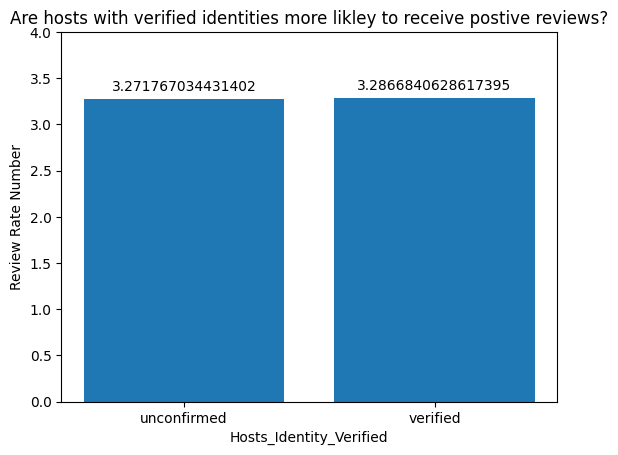

In [27]:
review_bar =plt.bar(review.index, review.loc[:,"review rate number"] );
plt.bar_label(review_bar, labels =review.loc[:,"review rate number"],padding=4);
plt.ylim(0,4);
plt.xlabel("Hosts_Identity_Verified");
plt.ylabel("Review Rate Number");
plt.title("Are hosts with verified identities more likley to receive postive reviews?");

Is there a correlation between the prices  of listings and its service fee

In [28]:
#Is there a correlation between the prices  of listings and its service fee
correlation = df['price'].corr(df['service fee'])
print(f"The correlation between price and service fee is: {correlation}")

The correlation between price and service fee is: 0.9999908755543349


<Axes: xlabel='price', ylabel='service fee'>

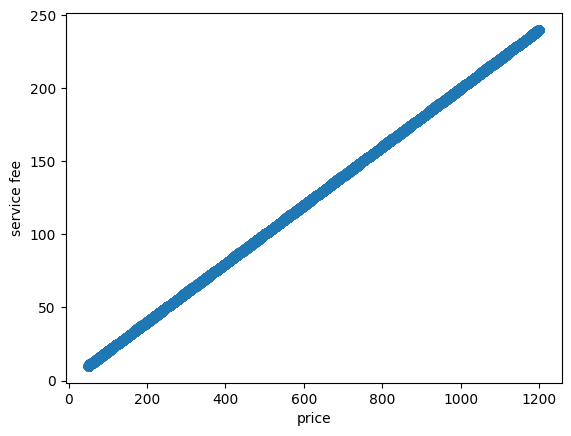

In [29]:
sns.regplot(df,x='price',y='service fee')


What is the average review rate number(eg.star) for listing and does it very based on the neighbrohood group and room type

Text(0.5, 1.0, 'What is the average review rate number (e.g., star) for listings and does it vary based on the neighbourhood group and room type?')

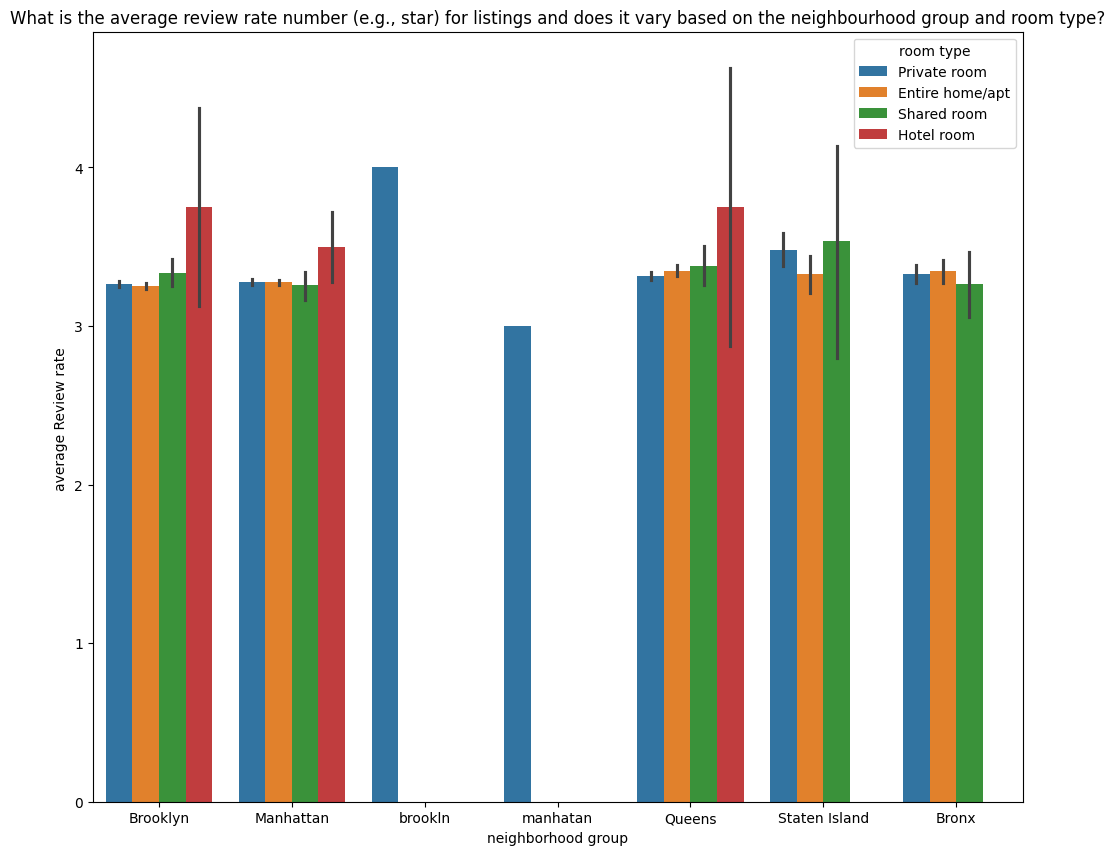

In [31]:

plt.figure(figsize=(12,10))
sns.barplot(data =df,x='neighbourhood group',y='review rate number',hue='room type');
plt.xlabel('neighborhood group');
plt.ylabel('average Review rate ');
plt.title('What is the average review rate number (e.g., star) for listings and does it vary based on the neighbourhood group and room type?')

In [30]:
#What is the average review rate number(eg.star) for listing and does it very based on the neighbrohood group and room type
ARRN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.346457
                    Private room               3.329706
                    Shared room                3.264957
Brooklyn            Entire home/apt            3.250378
                    Hotel room                 3.750000
                    Private room               3.264465
                    Shared room                3.336983
Manhattan           Entire home/apt            3.275807
                    Hotel room                 3.500000
                    Private room               3.277576
                    Shared room                3.257459
Queens              Entire home/apt            3.349154
                    Hotel room                 3.750000
                    Private room               3.315585
                    Shared room                3.377778
Staten Island       Entire home/apt            3.329087
                    Private room               3.479482
                    Shared room                3.533333
brookln             Private room               4.000000
manhatan            Private room               3.000000

Are hosts with a calculated host listings count more likely to maintain higher availability thoughtout the year

Text(0.5, 1.0, 'A regression  plot of the realtionship between calculated host listings count and availability 365')

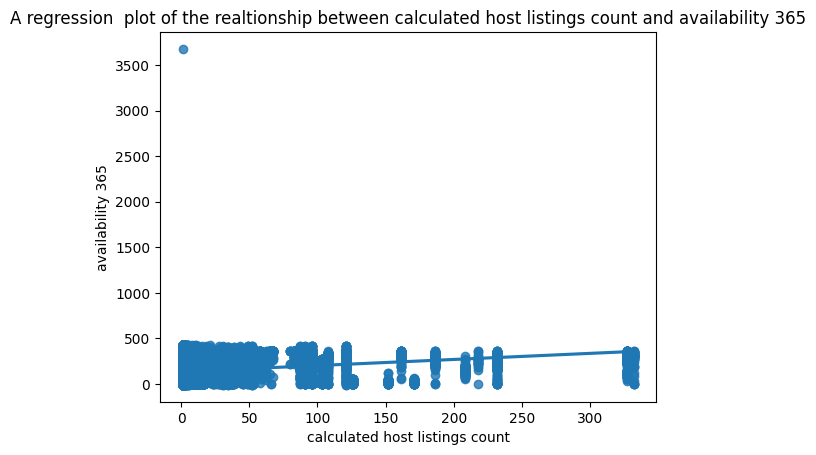

In [34]:
# Are hosts with a calculated host listings count more likely to maintain higher availability thoughtout the year
sns.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel('calculated host listings count');
plt.ylabel('availability 365');
plt.title('A regression  plot of the realtionship between calculated host listings count and availability 365')

In [33]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1591942422813064)